# Least Squares Regression

In [1]:
import numpy as np;
def LSRegression(Xtr, ytr, Xtst, ytst, errret=True) :
    wn = np.matmul(np.linalg.inv(np.matmul(Xtr.T,Xtr)),np.matmul(Xtr.T,ytr));
    yr = np.matmul(Xtst,wn);
    if (errret == False) :
        return(yr);
    error = 0;
    for i in range(len(ytst)):
        error += (ytst[i,0]-yr[i,0])**2;
    return error/len(ytst);

In [2]:
from sklearn.datasets import load_boston;
X,y = load_boston(True);
Xy = np.hstack((X,np.ones((506,1)),np.reshape(y,(506,1))));
np.random.shuffle(Xy);
X = Xy[:,0:14];
y = Xy[:,14:15];
Xtr = [];
ytr = [];
error = [];
index = [0,102,203,304,405,506];
for i in range(5) :
    Xtr.append(np.concatenate((X[0:index[i],:],X[index[i+1]:506,:]),0));
    ytr.append(np.concatenate((y[0:index[i],:],y[index[i+1]:506,:]),0));
    error.append(LSRegression(Xtr[i],ytr[i],X[index[i]:index[i+1],:],y[index[i]:index[i+1],:]));
erroravg = np.sum(error) / 5;
print("The average prediction error for the 5 folds is: ",erroravg);

The average prediction error for the 5 folds is:  25.767878225746614


Here is the plot of Predicted vs. Actual values:


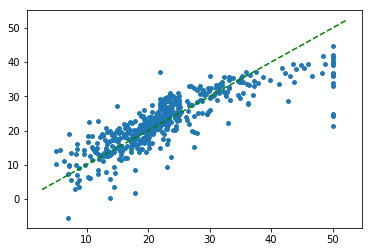

The data is roughly approximated by the green dotted line y=x.


In [7]:
import matplotlib.pyplot as plt;
yr = [];
for i in range(5) :
    yr.append(LSRegression(Xtr[i],ytr[i],X[index[i]:index[i+1],:],y[index[i]:index[i+1],:],False));
yr = np.vstack((yr[0],yr[1],yr[2],yr[3],yr[4]));
print("Here is the plot of Predicted vs. Actual values:");
fig = plt.figure();
ax = fig.add_subplot(111);
ax.scatter(y.tolist(),yr.tolist(),15);
ax.plot(np.array(ax.get_xlim()),np.array(ax.get_xlim()),'g--');
plt.show();
print("The data is roughly approximated by the green dotted line y=x.");

# Ridge Regression

In [4]:
import numpy as np;
def RidgeRegression(Xtr, ytr, Xtst, ytst, lamb) :
    wn = np.matmul(np.linalg.inv(np.add(np.matmul(Xtr.T,Xtr),lamb*np.identity(np.shape(Xtr)[1]))),np.matmul(Xtr.T,ytr));
    yr = np.matmul(Xtst,wn);
    error = 0;
    for i in range(len(ytst)):
        error += (ytst[i,0]-yr[i,0])**2;
    return error/len(ytst);

In [5]:
np.random.shuffle(Xy);
X = Xy[:,0:14];
y = Xy[:,14:15];
lambs = [0.02,0.04,0.06,0.08,0.10];
erroravg = [];
for lamb in lambs :
    Xtr = [];
    ytr = [];
    error = [];
    index = [0,102,203,304,405,506];
    for i in range(4) :
        Xtr.append(np.concatenate((X[0:index[i],:],X[index[i+2]:506,:]),0));
        ytr.append(np.concatenate((y[0:index[i],:],y[index[i+2]:506,:]),0));
        error.append(RidgeRegression(Xtr[i],ytr[i],X[index[i]:index[i+1],:],y[index[i]:index[i+1],:],lamb));
    Xtr.append(X[102:405,:]);
    ytr.append(y[102:405,:]);
    error.append(RidgeRegression(Xtr[4],ytr[4],X[405:506,:],y[405:506,:],lamb));
    erroravg.append(np.sum(error)/5);
bestlamb = lambs[np.argmin(erroravg)];
print("The most accurate lambda value is: ",bestlamb);

The most accurate lambda value is:  0.02


In [6]:
Xtr = [];
ytr = [];
error = [];
index = [0,102,203,304,405,506];
for i in range(5) :
    Xtr.append(np.concatenate((X[0:index[i],:],X[index[i+1]:506,:]),0));
    ytr.append(np.concatenate((y[0:index[i],:],y[index[i+1]:506,:]),0));
    error.append(RidgeRegression(Xtr[i],ytr[i],X[index[i]:index[i+1],:],y[index[i]:index[i+1],:],1));
erroravg = np.sum(error) / 5;
print("The average prediction error for the 5 folds is: ",erroravg);

The average prediction error for the 5 folds is:  25.108528168981042
